In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [3]:
import phuzzy as ph
import phuzzy.mpl.plots
from phuzzy.mpl import mix_mpl
import matplotlib.pyplot as plt
import numpy as np
# import matplotlib.mlab as mlab
import matplotlib.colors
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
import mpl_toolkits.mplot3d.art3d as art3d
from phuzzy.mpl import mix_mpl
from matplotlib.transforms import Bbox

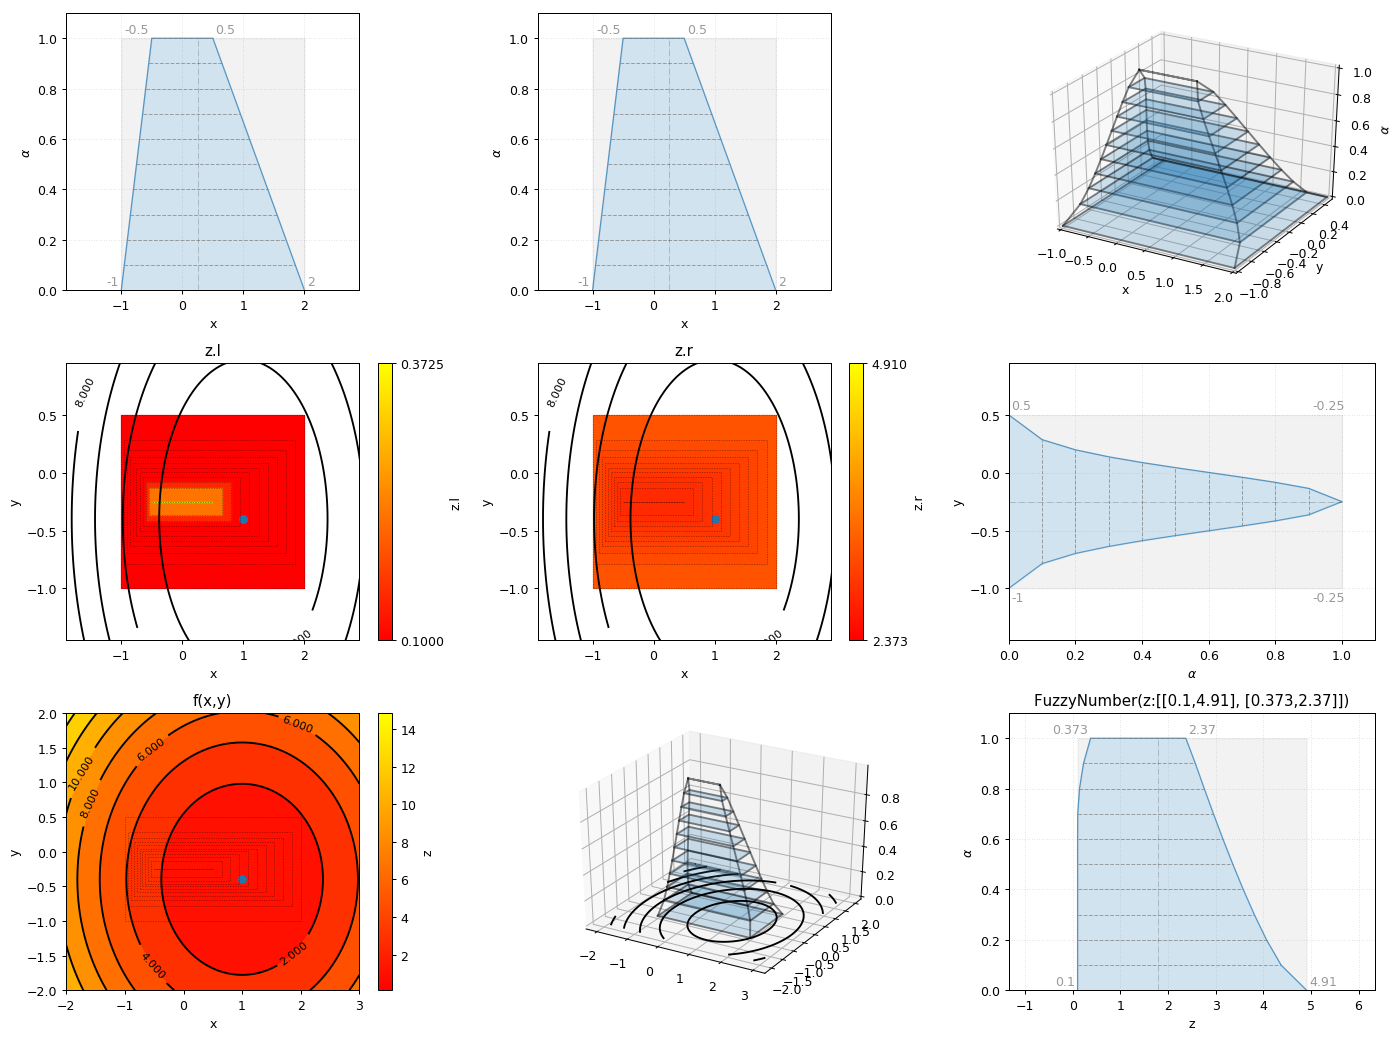

In [7]:
# -*- coding: utf-8 -*-



def f(x1, x2):
    return (x1-1)**2+(x2+.4)**2 + .1

xs = np.linspace(-2, 3, 100)
ys = np.linspace(-2, 2, 100)

Xs, Ys = np.meshgrid(xs, ys)

Zs = f(Xs, Ys)


Hf = 300.  # mm
Bf = 400.  # mm
fig, axs = plt.subplots(3,3, dpi=90, facecolor='w', edgecolor='k', figsize=(Bf / 25.4, Hf / 25.4))

axy = axs[1,2]
axx = axs[0,0]
axx2 = axs[0,1]
axx3 = axs[0,2]
axl = axs[1,0]
axr = axs[1,1]
axc = axs[2,0]
axm = axs[2,1]
axz = axs[2,2]
ax3d = fig.add_subplot(111, projection='3d')
axm3d = fig.add_subplot(111, projection='3d')

axl.set_title("z.l")
axr.set_title("z.r")
for ax in [axl, axr, axc]:
    ax.set_xlabel("x")
    ax.set_ylabel("y")

axl.get_shared_x_axes().join(axl, axr, axx, axx2)
axl.get_shared_y_axes().join(axl, axr, axy)

cmap = "autumn"
# cmap = "viridis"


csc = axc.contourf(Xs, Ys, Zs, alpha=1, cmap=cmap)
csc2 = axc.contour(Xs, Ys, Zs, colors="k")
axc.clabel(csc2, fontsize=9, inline=1, alpha=1)

norm= matplotlib.colors.Normalize(vmin=Zs.min(), vmax=Zs.max())
# norm= matplotlib.colors.Normalize(vmin=csc.vmin, vmax=csc.vmax)
sm = plt.cm.ScalarMappable(norm=norm, cmap =csc.cmap)
sm.set_array([])
cbar = fig.colorbar(sm, ticks=csc.levels, ax=axc)
cbar.set_label("z")
x = ph.Trapezoid(alpha0=[-1,2], alpha1=[-.5, .5])
y = ph.TruncNorm(alpha0=[-1,0.5], name="y")

z = f(x,y)
z.name = "z"
# print(z.df)

# left
# cs = axl.contourf(Xs, Ys, Zs, alpha=.2, cmap="hot")
norml = matplotlib.colors.Normalize(vmin=z.df.l.min(), vmax=z.df.l.max())
sml = plt.cm.ScalarMappable(norm=norml, cmap=cmap)
sml.set_array([])
csl2 = axl.contour(Xs, Ys, Zs, colors="k")
# cs2k = axl.contour(Xs, Ys, Zs, colors="k")
axl.clabel(csl2, fontsize=9, inline=1, alpha=1)
cbarl = fig.colorbar(sml, ticks=[z.df.l.min(), z.df.l.max()], ax=axl)
cbarl.set_label("z.l")

# right
# cs = axr.contourf(Xs, Ys, Zs, alpha=.2, cmap="hot")
normr = matplotlib.colors.Normalize(vmin=z.df.r.min(), vmax=z.df.r.max())
smr = plt.cm.ScalarMappable(norm=normr, cmap=cmap)
smr.set_array([])
csr2 = axr.contour(Xs, Ys, Zs, colors="k")
# cs2k = axl.contour(Xs, Ys, Zs, colors="k")
axr.clabel(csr2, fontsize=9, inline=1, alpha=1)
cbarr = fig.colorbar(smr, ticks=[z.df.r.min(), z.df.r.max()], ax=axr)
cbarr.set_label("z.r")

for i, zi in z.df.iterrows():
    xi = x.df.loc[i]
    yi = y.df.loc[i]
    polygon = Polygon(np.vstack([[xi.l, xi.r, xi.r, xi.l, xi.l],
                           [yi.l, yi.l, yi.r, yi.r, yi.l]]).T)

    pl = PatchCollection([polygon], alpha=1, color=sml.to_rgba(zi.l))
    axl.add_collection(pl)
    pr = PatchCollection([polygon], alpha=1, color=sm.to_rgba(zi.r))
    axr.add_collection(pr)

    axl.plot([xi.l, xi.r, xi.r, xi.l, xi.l],
            [yi.l, yi.l, yi.r, yi.r, yi.l],
             c="k", alpha=.5, lw=.5, dashes=[2,2])

    axc.plot([xi.l, xi.r, xi.r, xi.l, xi.l],
            [yi.l, yi.l, yi.r, yi.r, yi.l],
             c="k", alpha=.5, lw=.5, dashes=[2,2])

    axr.plot([xi.l, xi.r, xi.r, xi.l, xi.l],
            [yi.l, yi.l, yi.r, yi.r, yi.l],
             c="k", alpha=.5, lw=.5, dashes=[2,2])

axl.scatter([1], [-.4])
axr.scatter([1], [-.4])
axc.scatter([1], [-.4])

mix_mpl(x)
mix_mpl(y)
mix_mpl(z)
x.plot(ax=axx, show=False)
x.plot(ax=axx2, show=False)
y.vplot(ax=axy, show=False)
z.plot(ax=axz, show=False)
axz.set_title(z)
axc.set_title("f(x,y)")

# print(dir(axx3.axes))
# print(axx3.axes.get_position())
# print(axx3.axes.get_geometry())
phuzzy.mpl.plots.plot_3d(x,y, ax=ax3d)

# axl.set_xlim(-1,1)
fig.tight_layout()
ax3d.axes.set_position(axx3.axes.get_position())
axm3d.axes.set_position(axm.axes.get_position())
# figm2, axm2 = phuzzy.mpl.plots.plot_3d(x,y, ax=axm3d)
axm3d.contour(Xs, Ys, (Zs/(Zs.max()-Zs.min())-Zs.min())*.01, colors="k")

for i, zi in z.df.iterrows():
    xi = x.df.loc[i]
    yi = y.df.loc[i]
    polygon = Polygon(np.vstack([[xi.l, xi.r, xi.r, xi.l, xi.l],
                           [yi.l, yi.l, yi.r, yi.r, yi.l]]).T,
                      alpha=.2)
    axm3d.add_patch(polygon)
    art3d.pathpatch_2d_to_3d(polygon, z=yi.alpha)

    axm3d.plot([xi.l, xi.r, xi.r, xi.l, xi.l],
            [yi.l, yi.l, yi.r, yi.r, yi.l],
            [yi.alpha, yi.alpha, yi.alpha, yi.alpha, yi.alpha],
             c="k", alpha=.5, lw=1.5)

axm3d.plot(x.df.l, y.df.l, y.df.alpha, c="k", alpha=.5, lw=1.5)
axm3d.plot(x.df.l, y.df.r, y.df.alpha, c="k", alpha=.5, lw=1.5)
axm3d.plot(x.df.r, y.df.l, y.df.alpha, c="k", alpha=.5, lw=1.5)
axm3d.plot(x.df.r, y.df.r, y.df.alpha, c="k", alpha=.5, lw=1.5)

axx3.axis('off')
axm.axis('off')


bboxx = axl.get_position()
old_bboxx = axx.get_position(bboxx)
bbx = Bbox.from_bounds(old_bboxx.x0, old_bboxx.y0, bboxx.size[0], old_bboxx.size[1])
axx.set_position(bbx)

bboxx2 = axl.get_position()
old_bboxx2 = axx2.get_position(bboxx2)
bbx2 = Bbox.from_bounds(old_bboxx2.x0, old_bboxx2.y0, bboxx2.size[0], old_bboxx2.size[1])
axx2.set_position(bbx2)

